<a href="https://colab.research.google.com/github/dylanoreilly1/final-year/blob/main/Copy_of_dissertation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving health_data.csv to health_data.csv


In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

df=pd.read_csv("health_data.csv")
df
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["No stroke", "Stroke"]

In [4]:
print('The shape of the dataset is:', df.shape)


The shape of the dataset is: (70692, 18)


In [5]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


In [6]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int64
 1   Sex                   70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   HeartDiseaseorAttack  70692 non-null  int64
 7   PhysActivity          70692 non-null  int64
 8   Fruits                70692 non-null  int64
 9   Veggies               70692 non-null  int64
 10  HvyAlcoholConsump     70692 non-null  int64
 11  GenHlth               70692 non-null  int64
 12  MentHlth              70692 non-null  int64
 13  PhysHlth              70692 non-null  int64
 14  DiffWalk              70692 non-null  int64
 15  Diabetes              70692 non-null  int64
 16  Hype

In [7]:
print(df.columns)

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')


In [8]:

columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Stroke"]]
target = "Stroke"
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(70692, 17)
(70692,)


In [9]:
df.isnull().values.any()

False

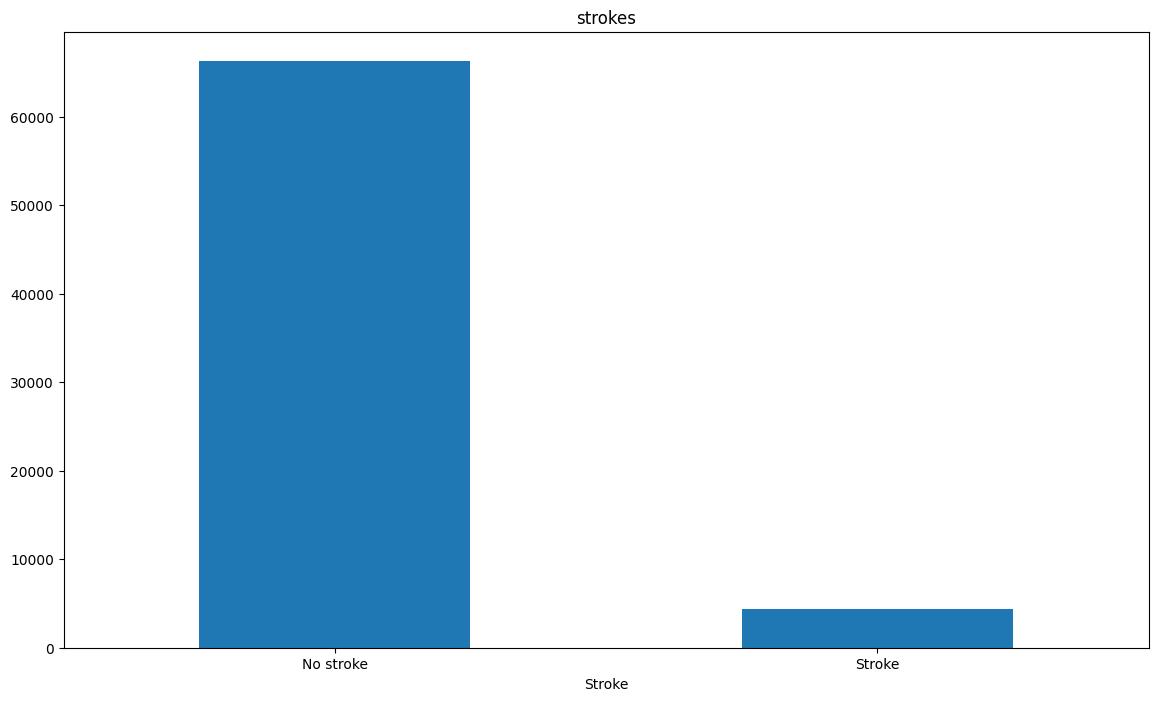

In [10]:
Count_classes = pd.value_counts(df['Stroke'], sort = True)
Count_classes.plot(kind = 'bar', rot=0)
plt.title("strokes")
plt.xticks(range(2), LABELS)
plt.xlabel("Stroke")
plt.ylabel = ("frequency")

balence dataset


In [11]:
stroke = df[df['Stroke']==1]
no_stroke = df[df['Stroke']==0]

In [12]:
print(stroke.shape, no_stroke.shape)

(4395, 18) (66297, 18)


In [13]:
from imblearn.under_sampling import NearMiss
from imblearn import under_sampling as us

us.NearMiss(
    sampling_strategy='auto',
    version=1,
    n_neighbors=3,
    n_neighbors_ver3=3,
    n_jobs=None,
)

NearMiss()

In [14]:
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)
y_res.value_counts()

0    4395
1    4395
Name: Stroke, dtype: int64

In [15]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 66297, 1: 4395})
Resampled dataset shape Counter({0: 4395, 1: 4395})


In [16]:
model_features1 = df.columns.drop('Stroke')
model_target1 = 'Stroke'

print('Model features: ', model_features1)
print('Model target: ', model_target1)

Model features:  Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension'],
      dtype='object')
Model target:  Stroke


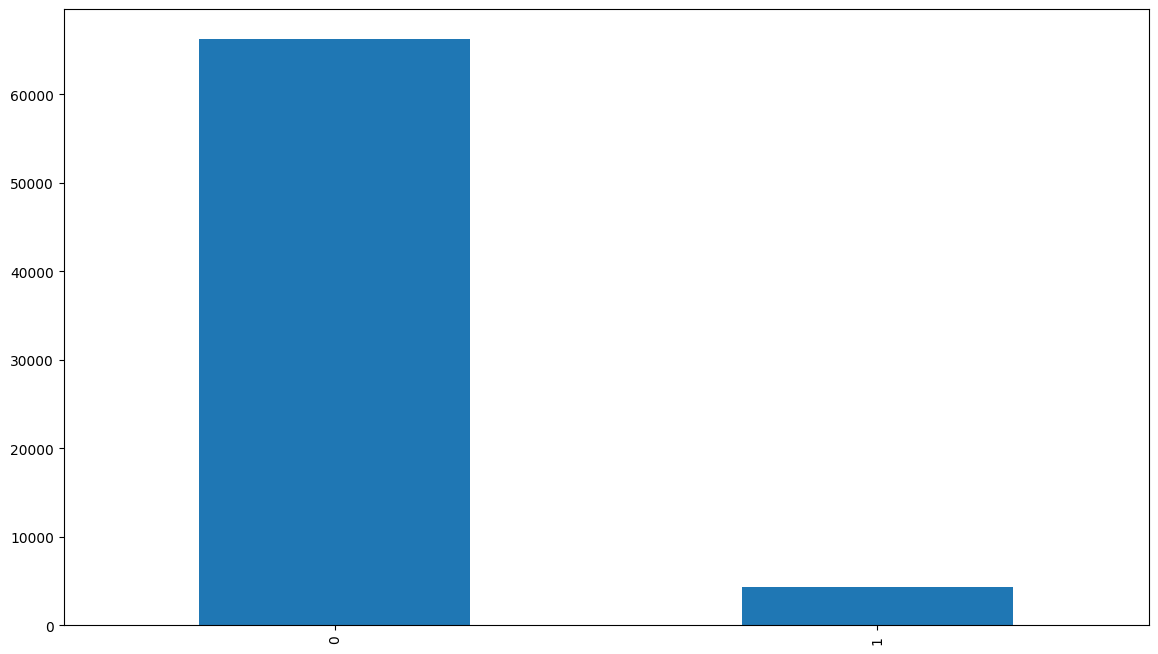

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target1].value_counts().plot.bar()
plt.show()

In [18]:
import numpy as np
numerical_features_all = df[model_features1].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

Numerical columns: Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension'],
      dtype='object')



In [19]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age
min: 1 max: 13
Sex
min: 0 max: 1
HighChol
min: 0 max: 1
CholCheck
min: 0 max: 1
BMI
min: 12 max: 98
Smoker
min: 0 max: 1
HeartDiseaseorAttack
min: 0 max: 1
PhysActivity
min: 0 max: 1
Fruits
min: 0 max: 1
Veggies
min: 0 max: 1
HvyAlcoholConsump
min: 0 max: 1
GenHlth
min: 1 max: 5
MentHlth
min: 0 max: 30
PhysHlth
min: 0 max: 30
DiffWalk
min: 0 max: 1
Diabetes
min: 0 max: 1
Hypertension
min: 0 max: 1


In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=23)

In [21]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target1] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target1] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target1] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target1] == 1))

Training set shape: (63622, 18)
Class 0 samples in the training set: 59647
Class 1 samples in the training set: 3975
Class 0 samples in the test set: 6650
Class 1 samples in the test set: 420


In [22]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target1] == 0]
class_1_no = train_data[train_data[model_target1] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [23]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target1] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target1] == 0))

Training set shape: (7950, 18)
Class 1 samples in the training set: 3975
Class 0 samples in the training set: 3975


KNN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [25]:
X_train = train_data[numerical_features_all]
y_train = train_data[model_target1]
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[3228  747]
 [ 689 3286]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3975
           1       0.81      0.83      0.82      3975

    accuracy                           0.82      7950
   macro avg       0.82      0.82      0.82      7950
weighted avg       0.82      0.82      0.82      7950

Train accuracy: 0.8193710691823899


In [27]:
from sklearn.model_selection import cross_validate

X = train_data[numerical_features_all]
y = train_data[model_target1]

#5 fold cross validation on the classifier
cv_results = cross_validate(classifier, X, y, cv=5)

#Print the average test score
print('Average test score:', cv_results['test_score'].mean())

Average test score: 0.6649056603773584


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
X_test = test_data[numerical_features_all]
y_test = test_data[model_target1]


test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[4455 2195]
 [ 146  274]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      6650
           1       0.11      0.65      0.19       420

    accuracy                           0.67      7070
   macro avg       0.54      0.66      0.49      7070
weighted avg       0.92      0.67      0.76      7070

Test accuracy: 0.6688826025459689


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'imputer__strategy': ['mean', 'median'],
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance']
}
#Creating a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5)

#put the gridsearch object to the training data
grid_search.fit(X_train, y_train)
#print the best hyperparameters 
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'estimator__n_neighbors': 7, 'estimator__weights': 'uniform', 'imputer__strategy': 'mean'}
Best score: 0.6849056603773584


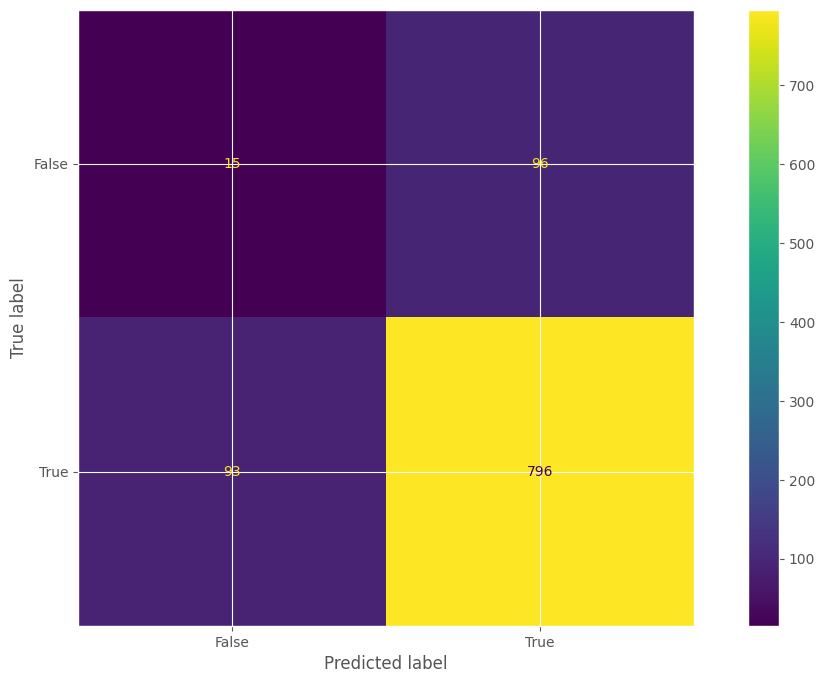

In [50]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

random forest

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Stroke',axis=1)
y = df[['Stroke']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (criterion = "gini",
                              max_depth = 8,
                              min_samples_split=10,
                              random_state=5)

In [32]:
clf.fit(x_train, y_train)

<ipython-input-32-5c93c534242c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [33]:
y_pred = clf.predict(x_test)


In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9377652050919377

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.9378389 , 0.9378389 , 0.93783401, 0.93783401, 0.93783401])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7070
           1       0.00      0.00      0.00         0

    accuracy                           0.94      7070
   macro avg       0.50      0.47      0.48      7070
weighted avg       1.00      0.94      0.97      7070



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, cv=5, n_iter=1, n_jobs=8, random_state=42)
random_search.fit(x_train, y_train)
print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 33, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 120}
Best score:  0.9373172934336917


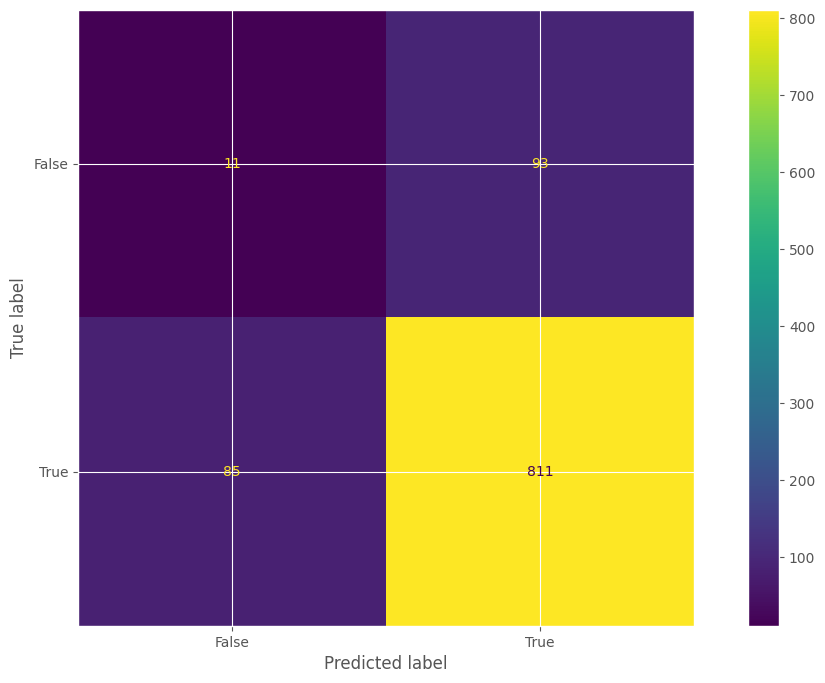

In [49]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

<ipython-input-39-42e2d6b1ec1f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


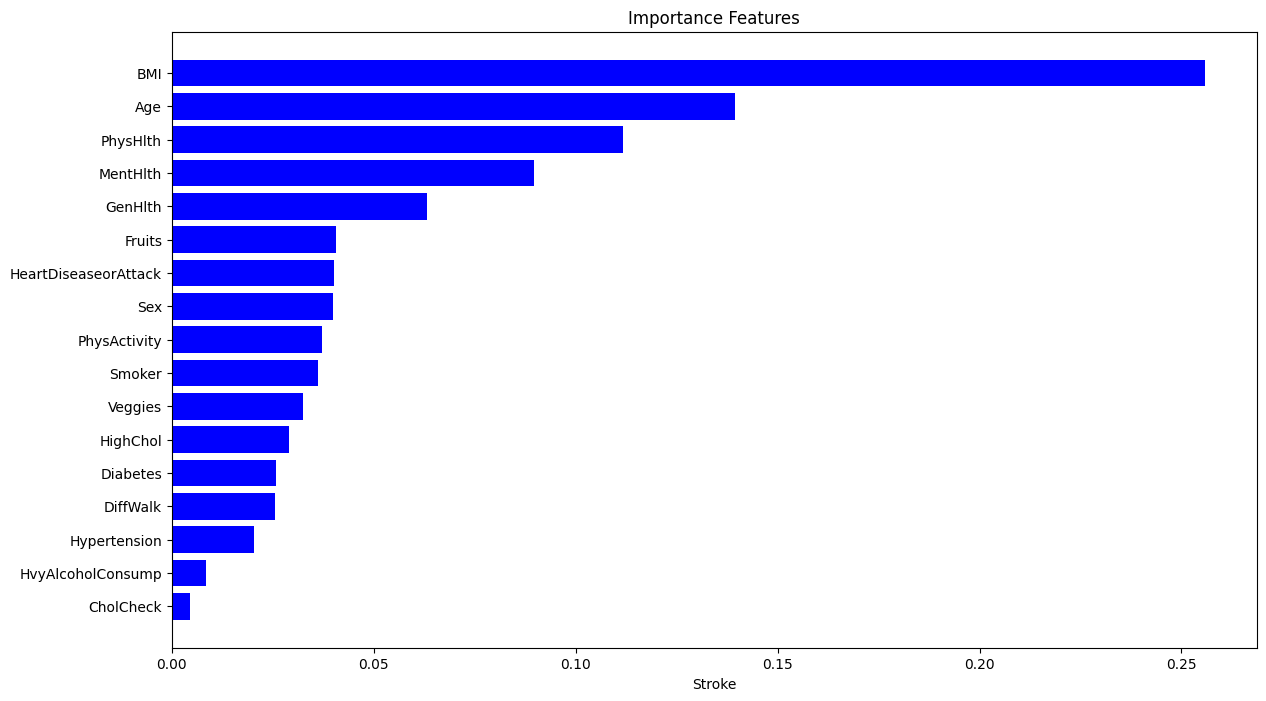

In [39]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
features = df.columns

importances = clf.feature_importances_
indices = np.argsort(importances)


plt.title("Importance Features")
plt.barh(range(len(indices)), importances[indices], color='b', align ='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Stroke")
plt.show()

XGBoost


In [40]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(df.drop('Stroke', axis=1), df['Stroke'], test_size=0.1, random_state=42)

In [41]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [42]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [43]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6630
           1       0.17      0.01      0.02       440

    accuracy                           0.94      7070
   macro avg       0.55      0.50      0.49      7070
weighted avg       0.89      0.94      0.91      7070

[[6610   20]
 [ 436    4]]


In [44]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

model = xgb.XGBClassifier()

#perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

#print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())

Cross-validation scores: [0.93540275 0.93618861 0.93571204 0.93673373 0.93524049]
Mean score: 0.9358555235561836


In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

#create an instance of the XGB
model = XGBClassifier()

#define the hyperparameters 
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 1000),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
}
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, cv=5, n_iter=1, n_jobs=8, random_state=42)
random_search.fit(X_train, y_train)

#print the best hyperparameters 
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best hyperparameters: {'gamma': 0.18727005942368125, 'learning_rate': 0.10507143064099161, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 800}
Best score: 0.9364528125924494


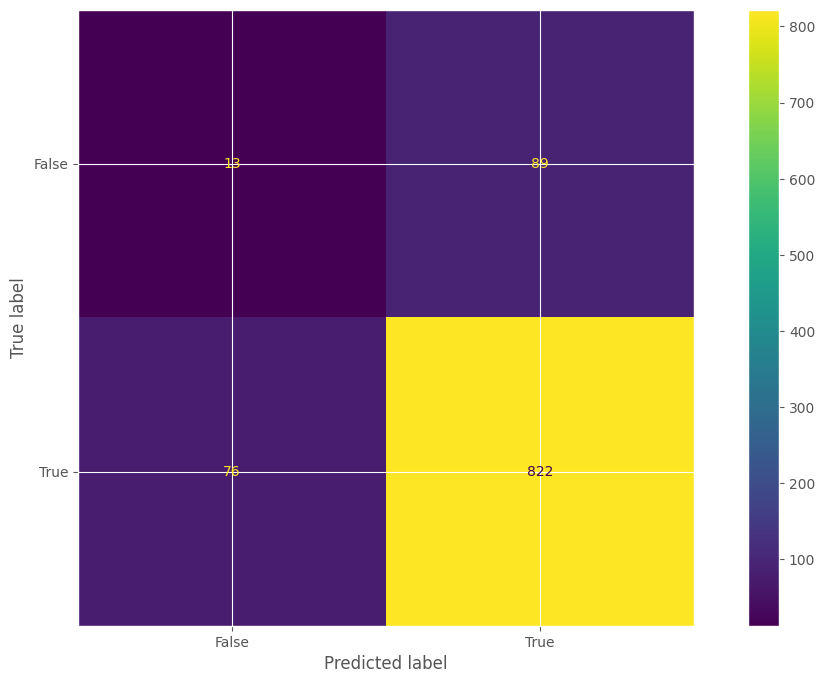

In [48]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Decison tree

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int64
 1   Sex                   70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   HeartDiseaseorAttack  70692 non-null  int64
 7   PhysActivity          70692 non-null  int64
 8   Fruits                70692 non-null  int64
 9   Veggies               70692 non-null  int64
 10  HvyAlcoholConsump     70692 non-null  int64
 11  GenHlth               70692 non-null  int64
 12  MentHlth              70692 non-null  int64
 13  PhysHlth              70692 non-null  int64
 14  DiffWalk              70692 non-null  int64
 15  Diabetes              70692 non-null  int64
 16  Hype

In [54]:
X = df.drop('Stroke',axis=1)
y = df[['Stroke']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [57]:
y_predict = clf_model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)


0.9377652050919377

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
scores = cross_val_score(clf_model, X_train, y_train, cv=5)

print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())

Cross-validation scores: [0.9378389  0.9378389  0.93783401 0.93783401 0.93783401]
Mean score: 0.9378359685979314


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 3, 5, 10]
}

grid_search = GridSearchCV(clf_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}


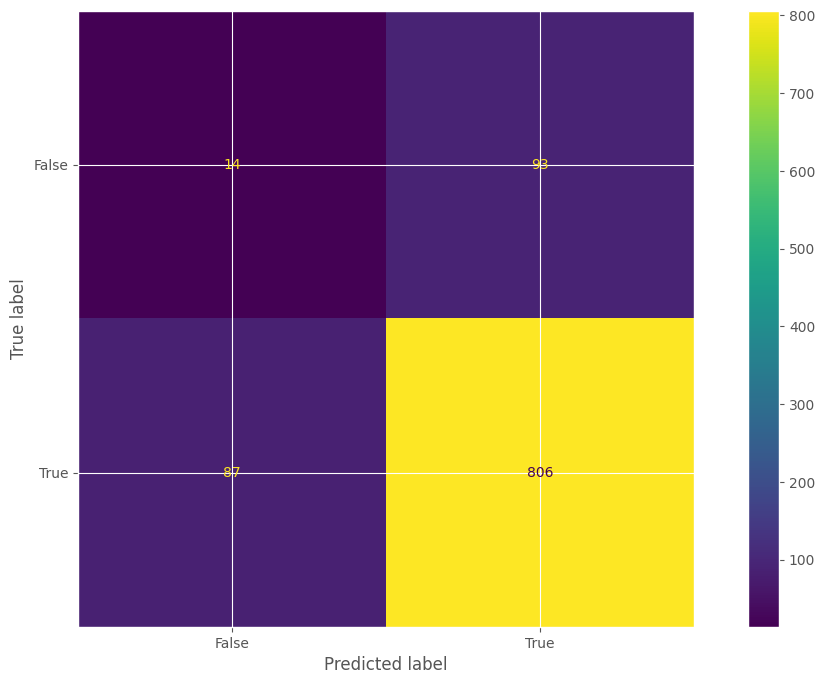

In [61]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
columns1 = df[['Age','Sex','HighChol','CholCheck','BMI','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','Diabetes']]

In [ ]:
sns.displot(df['BMI'])

In [ ]:
sns.boxplot(df['BMI'])

In [ ]:
for column in columns1:
  sns.boxplot(data=df[column])
  plt.title(column)
  plt.show()
    



In [ ]:
graphs = df[['Age','Sex','HighChol','CholCheck','BMI','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','Diabetes']]
sns.pairplot(graphs)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=23)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target1] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target1] == 1))

In [ ]:
from pandas.api import types
missing data
outliers
balance dataset
heatmap/ corrolation map
data types
test train split
models